In [13]:
import torch
import torchvision

tabu1 = []
tabu2 = []

n_epochs = 100
batch_size_train = 512
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [14]:

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

print(train_loader)
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)


torch.Size([512, 1, 28, 28])


In [15]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [16]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [17]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='train', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='test', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [18]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)



In [19]:
def initMatrix(size, append_with):
    ary = []
    for i in range(0, size):
        ary.append(append_with)
    return ary


In [20]:
from torch.nn.modules import Module
from torch.nn import functional as F
from torch._jit_internal import weak_module, weak_script_method

class Dropout(Module):
    def __init__(self, p=0.5, inplace=False):
        super(Dropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace

    def forward(self, input):
        varTemp = F.dropout(input, self.p, self.training, self.inplace)
        return varTemp

    def __repr__(self):
        inplace_str = ', inplace' if self.inplace else ''
        return self.__class__.__name__ + '(' \
            + 'p=' + str(self.p) \
            + inplace_str + ')'
    
class MyLinear(torch.nn.Linear):
    def __init__(self, in_feats, out_feats, drop_p, t, bias=True):
        super(MyLinear, self).__init__(in_feats, out_feats, bias=bias)
        self.masker = Dropout(p=drop_p)
        self.tabu = t
        self.firstItr = True
        self.network_dropout = drop_p
        self.historial_tabu_count = initMatrix(1024, 0)

    def forward(self, input):
        #print(self.tabu)
        #print(input)
        
       
        masked_weight = self.masker(self.weight)
        #print(masked_weight)
        output = F.linear(input, masked_weight, self.bias)
        
        # Here goes TABU
        if self.firstItr == True:
            
            self.firstItr = False
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    self.tabu[i] = 0
        else:
            
            temp_tabu = initMatrix(len(output[0]), 1)
            
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    temp_tabu[i] = 0

            for i in range(0, len(output[0])):
                if (self.tabu[i] == 0 and temp_tabu[i] == 0):
                    # Neuron will be dropped
                    self.historial_tabu_count[i] = self.historial_tabu_count[i] + 1
                    
                    if self.historial_tabu_count[i] > 3:
                      
                      self.tabu[i] = 1
                      output[0][i] = input[0][i]
                      self.historial_tabu_count[i] = 0
                else:
                    self.tabu[i] = temp_tabu[i]
                    
            #print(temp_tabu)
            
        #print(self.historial_tabu_count)    
     
            
        #print(output)
        #print(self.tab5u)
        
        self.firstItr = False
        
        return output

In [21]:
tabu1 = initMatrix(1024, 1)
tabu2 = initMatrix(1024, 1)

layer1_dropout = 0.5
layer2_dropout = 0.5

#tabu3 = initMatrix(512)

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # define the layers and their sizes, turn off bias
        
        self.fc1 = nn.Linear(784, 1024)
       
        self.aD1 = MyLinear(1024, 1024, layer1_dropout, tabu1) #nn.Dropout(0.5) # # #      
        
        #self.d2 = nn.Dropout(0.5)
        #self.aD2 = MyLinear(1024, 1024, layer2_dropout, tabu2) 
        #self.fc2 = nn.Linear(1024, 1024)
        #self.d2 = Dropout(0.5) 
        #self.fc3 = nn.Linear(1024, 1024)
        
        #For CIFAR-10
        #self.d3 = Dropout(0.3) 
        #self.fc3_1 = nn.Linear(512, 256)
        
        self.fc4 = nn.Linear(1024, 10)
        

    def forward(self, x):
        x = x.view(-1, 784)
        
        x = F.relu(self.fc1(x))
        #print("First TABU Layer")
        x = F.relu(self.aD1(x))
        #print("Second TABU Layer")
        #x = F.relu(self.dT(x))
        #x = F.relu(self.aD2(x))
        
        #x = F.relu(self.d2(x))
        #x = F.relu(self.fc3(x))
        
        # for CIFAR-10
        #x = F.relu(self.d3(x))
        #x = F.relu(self.fc3_1(x))
        x = self.fc4(x)
        return F.log_softmax(x)

In [23]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

In [24]:
avg_train_loss = []
avg_train_counter = []
avg_test_loss = []
avg_test_counter = []
test_accuracy_list = []

test_losses = []
test_counter = []

epoch_number = 0
train_avg_loss = 0
test_avg_loss = 0

In [25]:
def train(epoch):
  
    train_losses = []
    train_counter = []
    
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), './results/fasionmnist_with_avgtabu_model.pth')
            torch.save(optimizer.state_dict(), './results/fasionmnist_with_avgtabu_optimizer.pth')
            #test(epoch, False)
            
    sum = 0.0
    for loss in train_losses:
      sum = sum + loss
    
    avg_train_loss.append(sum / len(train_losses))

In [26]:
def test(epoch):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
        #iterator = iter(test_loader)
        #data, target= iterator.next() 
        
            examples = enumerate(test_loader)
            batch_idx, (example_data, example_targets) = next(examples)  
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(test_loader.dataset)
    avg_test_loss.append(test_loss)
    test_counter.append((batch_idx*64) + ((epoch-1)*len(test_loader.dataset)))
    test_accuracy_list.append(100. * correct / len(test_loader.dataset))
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
   

In [27]:
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test(epoch)   

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.327716
Train Epoch: 1 [5120/60000 (8%)]	Loss: 2.203989
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.080095
Train Epoch: 1 [15360/60000 (25%)]	Loss: 1.960088
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.841771
Train Epoch: 1 [25600/60000 (42%)]	Loss: 1.706372
Train Epoch: 1 [30720/60000 (51%)]	Loss: 1.561395
Train Epoch: 1 [35840/60000 (59%)]	Loss: 1.497776
Train Epoch: 1 [40960/60000 (68%)]	Loss: 1.382727
Train Epoch: 1 [46080/60000 (76%)]	Loss: 1.328371
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.230072
Train Epoch: 1 [56320/60000 (93%)]	Loss: 1.211658
Test set: Avg. loss: 1.0698, Accuracy: 6498/10000 (64%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.111567
Train Epoch: 2 [5120/60000 (8%)]	Loss: 1.116737
Train Epoch: 2 [10240/60000 (17%)]	Loss: 1.015146
Train Epoch: 2 [15360/60000 (25%)]	Loss: 0.990579
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.979843
Train Epoch: 2 [25600/60000 (42%)]	Loss: 0.949116
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.938405
Train E

Train Epoch: 13 [40960/60000 (68%)]	Loss: 0.470997
Train Epoch: 13 [46080/60000 (76%)]	Loss: 0.462300
Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.474416
Train Epoch: 13 [56320/60000 (93%)]	Loss: 0.500268
Test set: Avg. loss: 0.5044, Accuracy: 8209/10000 (82%)

Train Epoch: 14 [0/60000 (0%)]	Loss: 0.493157
Train Epoch: 14 [5120/60000 (8%)]	Loss: 0.415811
Train Epoch: 14 [10240/60000 (17%)]	Loss: 0.431457
Train Epoch: 14 [15360/60000 (25%)]	Loss: 0.492604
Train Epoch: 14 [20480/60000 (34%)]	Loss: 0.528611
Train Epoch: 14 [25600/60000 (42%)]	Loss: 0.481787
Train Epoch: 14 [30720/60000 (51%)]	Loss: 0.526731
Train Epoch: 14 [35840/60000 (59%)]	Loss: 0.467450
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.394394
Train Epoch: 14 [46080/60000 (76%)]	Loss: 0.455277
Train Epoch: 14 [51200/60000 (85%)]	Loss: 0.452071
Train Epoch: 14 [56320/60000 (93%)]	Loss: 0.558289
Test set: Avg. loss: 0.4856, Accuracy: 8280/10000 (82%)

Train Epoch: 15 [0/60000 (0%)]	Loss: 0.430698
Train Epoch: 15 [5120/60000 (8%

Train Epoch: 26 [0/60000 (0%)]	Loss: 0.433020
Train Epoch: 26 [5120/60000 (8%)]	Loss: 0.394932
Train Epoch: 26 [10240/60000 (17%)]	Loss: 0.516940
Train Epoch: 26 [15360/60000 (25%)]	Loss: 0.393176
Train Epoch: 26 [20480/60000 (34%)]	Loss: 0.422760
Train Epoch: 26 [25600/60000 (42%)]	Loss: 0.413608
Train Epoch: 26 [30720/60000 (51%)]	Loss: 0.383192
Train Epoch: 26 [35840/60000 (59%)]	Loss: 0.416155
Train Epoch: 26 [40960/60000 (68%)]	Loss: 0.416521
Train Epoch: 26 [46080/60000 (76%)]	Loss: 0.358036
Train Epoch: 26 [51200/60000 (85%)]	Loss: 0.349583
Train Epoch: 26 [56320/60000 (93%)]	Loss: 0.394873
Test set: Avg. loss: 0.4415, Accuracy: 8423/10000 (84%)

Train Epoch: 27 [0/60000 (0%)]	Loss: 0.383282
Train Epoch: 27 [5120/60000 (8%)]	Loss: 0.358825
Train Epoch: 27 [10240/60000 (17%)]	Loss: 0.376326
Train Epoch: 27 [15360/60000 (25%)]	Loss: 0.375665
Train Epoch: 27 [20480/60000 (34%)]	Loss: 0.373357
Train Epoch: 27 [25600/60000 (42%)]	Loss: 0.360027
Train Epoch: 27 [30720/60000 (51%)]	Los

Train Epoch: 38 [30720/60000 (51%)]	Loss: 0.342234
Train Epoch: 38 [35840/60000 (59%)]	Loss: 0.336083
Train Epoch: 38 [40960/60000 (68%)]	Loss: 0.442028
Train Epoch: 38 [46080/60000 (76%)]	Loss: 0.363686
Train Epoch: 38 [51200/60000 (85%)]	Loss: 0.349991
Train Epoch: 38 [56320/60000 (93%)]	Loss: 0.365001
Test set: Avg. loss: 0.4019, Accuracy: 8547/10000 (85%)

Train Epoch: 39 [0/60000 (0%)]	Loss: 0.357758
Train Epoch: 39 [5120/60000 (8%)]	Loss: 0.405228
Train Epoch: 39 [10240/60000 (17%)]	Loss: 0.378381
Train Epoch: 39 [15360/60000 (25%)]	Loss: 0.373981
Train Epoch: 39 [20480/60000 (34%)]	Loss: 0.348313
Train Epoch: 39 [25600/60000 (42%)]	Loss: 0.350801
Train Epoch: 39 [30720/60000 (51%)]	Loss: 0.432669
Train Epoch: 39 [35840/60000 (59%)]	Loss: 0.382675
Train Epoch: 39 [40960/60000 (68%)]	Loss: 0.352473
Train Epoch: 39 [46080/60000 (76%)]	Loss: 0.362398
Train Epoch: 39 [51200/60000 (85%)]	Loss: 0.348603
Train Epoch: 39 [56320/60000 (93%)]	Loss: 0.375049
Test set: Avg. loss: 0.4024, Acc

Train Epoch: 50 [56320/60000 (93%)]	Loss: 0.358175
Test set: Avg. loss: 0.3818, Accuracy: 8642/10000 (86%)

Train Epoch: 51 [0/60000 (0%)]	Loss: 0.332626
Train Epoch: 51 [5120/60000 (8%)]	Loss: 0.306531
Train Epoch: 51 [10240/60000 (17%)]	Loss: 0.299271
Train Epoch: 51 [15360/60000 (25%)]	Loss: 0.319504
Train Epoch: 51 [20480/60000 (34%)]	Loss: 0.335327
Train Epoch: 51 [25600/60000 (42%)]	Loss: 0.359874
Train Epoch: 51 [30720/60000 (51%)]	Loss: 0.321603
Train Epoch: 51 [35840/60000 (59%)]	Loss: 0.268764
Train Epoch: 51 [40960/60000 (68%)]	Loss: 0.340302
Train Epoch: 51 [46080/60000 (76%)]	Loss: 0.322024
Train Epoch: 51 [51200/60000 (85%)]	Loss: 0.340765
Train Epoch: 51 [56320/60000 (93%)]	Loss: 0.370457
Test set: Avg. loss: 0.3824, Accuracy: 8628/10000 (86%)

Train Epoch: 52 [0/60000 (0%)]	Loss: 0.295204
Train Epoch: 52 [5120/60000 (8%)]	Loss: 0.373785
Train Epoch: 52 [10240/60000 (17%)]	Loss: 0.315109
Train Epoch: 52 [15360/60000 (25%)]	Loss: 0.303469
Train Epoch: 52 [20480/60000 (34%

Train Epoch: 63 [15360/60000 (25%)]	Loss: 0.317428
Train Epoch: 63 [20480/60000 (34%)]	Loss: 0.308406
Train Epoch: 63 [25600/60000 (42%)]	Loss: 0.339424
Train Epoch: 63 [30720/60000 (51%)]	Loss: 0.402591
Train Epoch: 63 [35840/60000 (59%)]	Loss: 0.314178
Train Epoch: 63 [40960/60000 (68%)]	Loss: 0.295772
Train Epoch: 63 [46080/60000 (76%)]	Loss: 0.245385
Train Epoch: 63 [51200/60000 (85%)]	Loss: 0.306571
Train Epoch: 63 [56320/60000 (93%)]	Loss: 0.312236
Test set: Avg. loss: 0.3744, Accuracy: 8648/10000 (86%)

Train Epoch: 64 [0/60000 (0%)]	Loss: 0.267829
Train Epoch: 64 [5120/60000 (8%)]	Loss: 0.306347
Train Epoch: 64 [10240/60000 (17%)]	Loss: 0.274758
Train Epoch: 64 [15360/60000 (25%)]	Loss: 0.299466
Train Epoch: 64 [20480/60000 (34%)]	Loss: 0.295073
Train Epoch: 64 [25600/60000 (42%)]	Loss: 0.317330
Train Epoch: 64 [30720/60000 (51%)]	Loss: 0.294138
Train Epoch: 64 [35840/60000 (59%)]	Loss: 0.334834
Train Epoch: 64 [40960/60000 (68%)]	Loss: 0.280284
Train Epoch: 64 [46080/60000 (76

Train Epoch: 75 [40960/60000 (68%)]	Loss: 0.303404
Train Epoch: 75 [46080/60000 (76%)]	Loss: 0.333078
Train Epoch: 75 [51200/60000 (85%)]	Loss: 0.350449
Train Epoch: 75 [56320/60000 (93%)]	Loss: 0.254048
Test set: Avg. loss: 0.3532, Accuracy: 8721/10000 (87%)

Train Epoch: 76 [0/60000 (0%)]	Loss: 0.369914
Train Epoch: 76 [5120/60000 (8%)]	Loss: 0.274867
Train Epoch: 76 [10240/60000 (17%)]	Loss: 0.280263
Train Epoch: 76 [15360/60000 (25%)]	Loss: 0.281796
Train Epoch: 76 [20480/60000 (34%)]	Loss: 0.309889
Train Epoch: 76 [25600/60000 (42%)]	Loss: 0.297363
Train Epoch: 76 [30720/60000 (51%)]	Loss: 0.255382
Train Epoch: 76 [35840/60000 (59%)]	Loss: 0.270031
Train Epoch: 76 [40960/60000 (68%)]	Loss: 0.333285
Train Epoch: 76 [46080/60000 (76%)]	Loss: 0.310248
Train Epoch: 76 [51200/60000 (85%)]	Loss: 0.294330
Train Epoch: 76 [56320/60000 (93%)]	Loss: 0.259288
Test set: Avg. loss: 0.3557, Accuracy: 8717/10000 (87%)

Train Epoch: 77 [0/60000 (0%)]	Loss: 0.340424
Train Epoch: 77 [5120/60000 (8%

Train Epoch: 88 [0/60000 (0%)]	Loss: 0.283132
Train Epoch: 88 [5120/60000 (8%)]	Loss: 0.302022
Train Epoch: 88 [10240/60000 (17%)]	Loss: 0.267426
Train Epoch: 88 [15360/60000 (25%)]	Loss: 0.299103
Train Epoch: 88 [20480/60000 (34%)]	Loss: 0.288793
Train Epoch: 88 [25600/60000 (42%)]	Loss: 0.326746
Train Epoch: 88 [30720/60000 (51%)]	Loss: 0.287901
Train Epoch: 88 [35840/60000 (59%)]	Loss: 0.290086
Train Epoch: 88 [40960/60000 (68%)]	Loss: 0.246011
Train Epoch: 88 [46080/60000 (76%)]	Loss: 0.272172
Train Epoch: 88 [51200/60000 (85%)]	Loss: 0.272394
Train Epoch: 88 [56320/60000 (93%)]	Loss: 0.264174
Test set: Avg. loss: 0.3600, Accuracy: 8711/10000 (87%)

Train Epoch: 89 [0/60000 (0%)]	Loss: 0.240338
Train Epoch: 89 [5120/60000 (8%)]	Loss: 0.286506
Train Epoch: 89 [10240/60000 (17%)]	Loss: 0.286725
Train Epoch: 89 [15360/60000 (25%)]	Loss: 0.292430
Train Epoch: 89 [20480/60000 (34%)]	Loss: 0.284830
Train Epoch: 89 [25600/60000 (42%)]	Loss: 0.293046
Train Epoch: 89 [30720/60000 (51%)]	Los

Train Epoch: 100 [25600/60000 (42%)]	Loss: 0.280051
Train Epoch: 100 [30720/60000 (51%)]	Loss: 0.228522
Train Epoch: 100 [35840/60000 (59%)]	Loss: 0.269150
Train Epoch: 100 [40960/60000 (68%)]	Loss: 0.251009
Train Epoch: 100 [46080/60000 (76%)]	Loss: 0.296458
Train Epoch: 100 [51200/60000 (85%)]	Loss: 0.256461
Train Epoch: 100 [56320/60000 (93%)]	Loss: 0.280690
Test set: Avg. loss: 0.3447, Accuracy: 8749/10000 (87%)



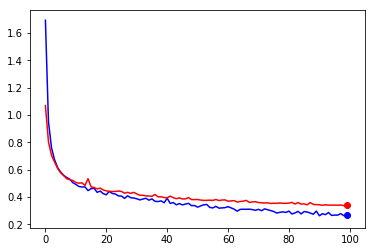

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()

final_train_counter = []
final_train_losses = []
final_test_counter = []
final_test_losses = []

for i in range(0, n_epochs):
  final_train_counter.append(i)
"""
for i in range(0, len(avg_train_loss)-1, 30):
    index = int(i/10)
    final_train_counter.append(train_counter[i])
    final_train_losses.append((train_losses[i] + train_losses[i+1]) / 2)
    final_test_counter.append(train_counter[i])
    final_test_losses.append((test_losses[i] + test_losses[i+1]) / 2)

final_train_counter.append(train_counter[len(train_counter)-1]) 
final_train_losses.append(train_losses[len(train_counter)-1])
final_test_counter.append(train_counter[len(train_counter)-1])
final_test_losses.append(test_losses[len(train_counter)-1])    
    
plt.plot(len(avg_train_loss), avg_train_loss, color='blue')
plt.scatter(avg_train_loss[-1], avg_train_loss[-1], color='blue')
plt.plot(len(avg_test_losses), avg_test_losses, color='red')
plt.scatter(avg_test_losses[-1], avg_test_losses[-1], color='red')

# print(len(test_counter))
# print(len(test_losses))

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
"""

plt.plot(final_train_counter, avg_train_loss, color='blue')
plt.scatter(final_train_counter[-1], avg_train_loss[-1], color='blue')
plt.plot(final_train_counter, avg_test_loss, color='red')
plt.scatter(final_train_counter[-1], avg_test_loss[-1], color='red')
# plt.plot(final_train_counter, test_accuracy_list, color='red')

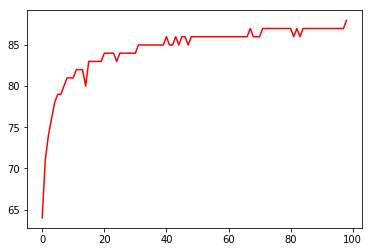

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

last_acc = []
last_counter = []
index = 0
for acc in range(0, len(test_accuracy_list)-1) :
  last_acc.append(test_accuracy_list[acc])
  last_counter.append(final_train_counter[index])
  index = index + 1

plt.plot(last_counter, last_acc, color='red')


In [34]:
class SavedAccuracy():
    
    def __init__(self, last_acc, last_counter, name="data.pkl"):
        self.last_acc = last_acc
        self.last_counter = last_counter
        self.name = name
    
    def saveGraph(self):
        graph = {'last_acc': self.last_acc, 'last_counter': self.last_counter}
        torch.save(graph, "./acc_data/"+ self.name) 
        
    def loadGraph(self):
        graph = torch.load("./acc_data/"+ self.name)
        last_acc_fetch = graph['last_acc']
        last_counter_fetch = graph['last_counter']

        return (last_acc_fetch, last_counter_fetch)
    

In [35]:
acc1 = SavedAccuracy(last_acc, last_counter, name='avg_dropout_acc.pkl')
acc1.saveGraph()

In [0]:
def makeCifar10Dec(param):
    if param == 0:
        return "airplane"
    elif param == 1:
        return "automobile"
    elif param == 2:
        return "bird"
    elif param == 3:
        return "cat"
    elif param == 4:
        return "deer"
    elif param == 5:
        return "dog"
    elif param == 6:
        return "frog"
    elif param == 7:
        return "horse"
    elif param == 8:
        return "ship"
    elif param == 9:
        return "truck"
    

examples = enumerate(test_loader)
for i in range(0, 10):
    batch_idx, (example_data, example_targets) = next(examples)
  
    with torch.no_grad():
        output = network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            plt.xticks([])
            plt.yticks([])


In [0]:
# Reloading a already saved model
'''
import matplotlib.pyplot as plt

continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

examples = enumerate(test_loader)
for i in range(0, 2):
    batch_idx, (example_data, example_targets) = next(examples)

    with torch.no_grad():
        output = continued_network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            
            plt.xticks([])
            plt.yticks([])
            
'''